In [2]:
!pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/17.7 MB 3.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/17.7 MB 2.4 MB/s eta 0:00:07
   --- ------------------------------------ 1.6/17.7 MB 2.6 MB/s eta 0:00:07
   ----- ---------------------------------- 2.4/17.7 MB 2.6 MB/s eta 0:00:06
   ----- ---------------------------------- 2.6/17.7 MB 2.5 MB/s eta 0:00:07
   ------- -------------------------------- 3.4/17.7 MB 2.5 MB/s eta 0:00:06
   -------- ------------------------------- 3.9/17.7 MB 2.5 MB/s eta 0:00:06
   --------- ------------------------------ 4.2/17.7 MB 2.5 MB/s eta 0:00:06
   ----------- ---------------------------- 5.0/17.7 MB 2.5 MB/s eta 0:00:06
   ----------- ---------------------------- 5.2/17.7 MB 2.5 MB/s eta 0:00:05
   ------------- -------------------------- 6.0/17.7 MB 2.5 MB/s eta 0:00:05
   -------------- ------------------------- 6.6/17.7 MB 2.5 MB/s eta 0:00:05
   ---

In [4]:
# Import PuLP
import pulp

# Initialize the problem
problem = pulp.LpProblem("Product_Mix_Optimization", pulp.LpMaximize)

# Define decision variables
# x1 = Number of units of Product A to produce
# x2 = Number of units of Product B to produce
x1 = pulp.LpVariable("x1", lowBound=0, cat="Integer")  # x1 >= 0, integer
x2 = pulp.LpVariable("x2", lowBound=0, cat="Integer")  # x2 >= 0, integer

# Objective function: Maximize profit
# Profit = 40 * x1 + 30 * x2
problem += 40 * x1 + 30 * x2, "Total_Profit"

# Constraints
# Raw Material: 2 * x1 + 1 * x2 <= 100
problem += 2 * x1 + 1 * x2 <= 100, "Raw_Material_Constraint"

# Machine Time: 1 * x1 + 2 * x2 <= 80
problem += 1 * x1 + 2 * x2 <= 80, "Machine_Time_Constraint"

# Labor: 4 * x1 + 3 * x2 <= 200
problem += 4 * x1 + 3 * x2 <= 200, "Labor_Constraint"

# Demand constraints
problem += x1 <= 40, "Max_Demand_Product_A"
problem += x2 <= 60, "Max_Demand_Product_B"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal number of Product A to produce:", pulp.value(x1))
print("Optimal number of Product B to produce:", pulp.value(x2))
print("Total Profit:", pulp.value(problem.objective))

Status: Optimal
Optimal number of Product A to produce: 38.0
Optimal number of Product B to produce: 16.0
Total Profit: 2000.0


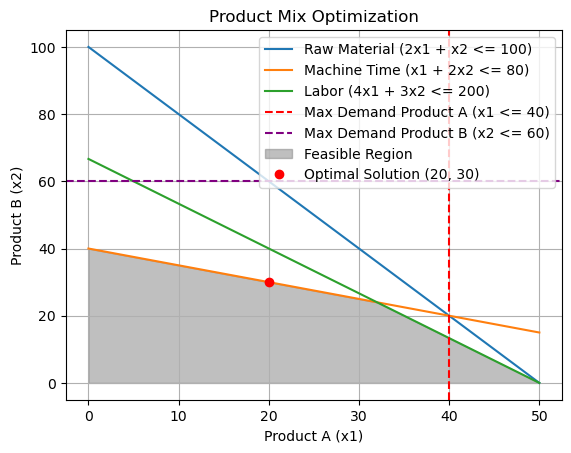

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
x = np.linspace(0, 50, 400)
y1 = 100 - 2 * x  # Raw Material: 2x1 + x2 <= 100
y2 = (80 - x) / 2  # Machine Time: x1 + 2x2 <= 80
y3 = (200 - 4 * x) / 3  # Labor: 4x1 + 3x2 <= 200

# Plot the constraints
plt.plot(x, y1, label="Raw Material (2x1 + x2 <= 100)")
plt.plot(x, y2, label="Machine Time (x1 + 2x2 <= 80)")
plt.plot(x, y3, label="Labor (4x1 + 3x2 <= 200)")

# Plot the demand constraints
plt.axvline(x=40, color="red", linestyle="--", label="Max Demand Product A (x1 <= 40)")
plt.axhline(y=60, color="purple", linestyle="--", label="Max Demand Product B (x2 <= 60)")

# Highlight the feasible region
y4 = np.minimum.reduce([y1, y2, y3])
plt.fill_between(x, 0, y4, where=(y4 >= 0), color="gray", alpha=0.5, label="Feasible Region")

# Plot the optimal solution
plt.plot(20, 30, "ro", label="Optimal Solution (20, 30)")

# Labels and legend
plt.xlabel("Product A (x1)")
plt.ylabel("Product B (x2)")
plt.title("Product Mix Optimization")
plt.legend()
plt.grid(True)
plt.show()